# Libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

# Data

In [ ]:
data = {
    'Workers': [1, 2, 3, 4, 5, 6, 7],
    'Values': [
        [795.897],
        [334.940, 347.773, 334.840],
        [261.519, 258.304, 251.367],
        [224.935, 229.461, 216.972],
        [208.578, 202.847, 200.277],
        [193.159, 195.384, 193.111],
        [179.621, 181.783, 175.615]
    ]
}

df = pd.DataFrame(data)

# Execution Time

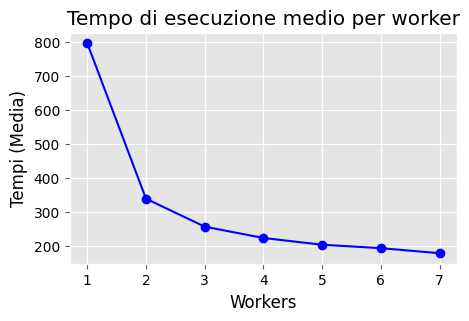

In [ ]:
df['Mean'] = df['Values'].apply(lambda x: sum(x) / len(x))

plt.figure(figsize=(5, 3), facecolor="white")

plt.plot(df['Workers'], df['Mean'], marker='o', linestyle='-', color='b')


plt.xlabel('Workers', color="black")
plt.ylabel('Tempi (Media)', color="black")
plt.title('Tempo di esecuzione medio per worker')
plt.xticks(df['Workers'], color="black")
plt.yticks(color="black")
plt.grid(True)

plt.show()

# Speedup

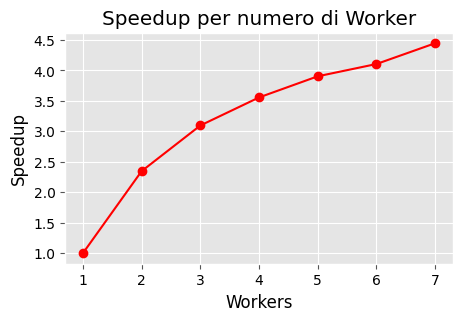

In [ ]:
df['SpeedUp'] = df['Mean'].apply(lambda x: 795.897/x)

plt.figure(figsize=(5, 3), facecolor="white")

plt.plot(df['Workers'], df['SpeedUp'], marker='o', linestyle='-', color='r')

plt.xlabel('Workers', color="black")
plt.ylabel('Speedup', color="black")
plt.title('Speedup per numero di Worker')
plt.xticks(df['Workers'], color="black") 
plt.yticks(color="black")
plt.grid(True)

plt.show()

# Strong Scaling Efficiency

   Workers                       Values        Mean   SpeedUp       SSE
0        1                    [795.897]  795.897000  1.000000  1.000000
1        2    [334.94, 347.773, 334.84]  339.184333  2.346503  1.173251
2        3  [261.519, 258.304, 251.367]  257.063333  3.096113  1.032038
3        4  [224.935, 229.461, 216.972]  223.789333  3.556456  0.889114
4        5  [208.578, 202.847, 200.277]  203.900667  3.903357  0.780671
5        6  [193.159, 195.384, 193.111]  193.884667  4.105002  0.684167
6        7  [179.621, 181.783, 175.615]  179.006333  4.446195  0.635171


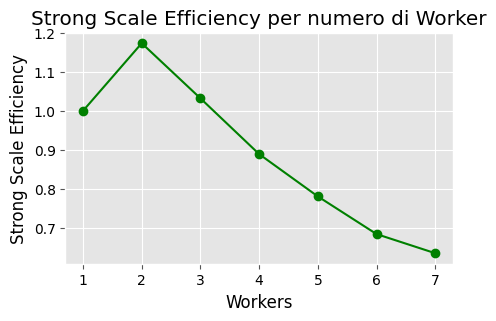

In [ ]:
df['SSE'] = df['SpeedUp'] / df["Workers"]

# Creazione del grafico
plt.figure(figsize=(5, 3), facecolor="white")

# Tracciare i punti medi
plt.plot(df['Workers'], df['SSE'], marker='o', linestyle='-', color='g', label='Media Tempi')

# Aggiungere etichette e titolo
plt.xlabel('Workers', color="black")
plt.ylabel('Strong Scale Efficiency', color="black")
plt.title('Strong Scale Efficiency per numero di Worker')
plt.xticks(df['Workers'], color="black")  # Imposta i tick dell'asse x
plt.yticks(color="black")
plt.grid(True)

# Mostra il grafico
plt.show()

# Comparison of solutions

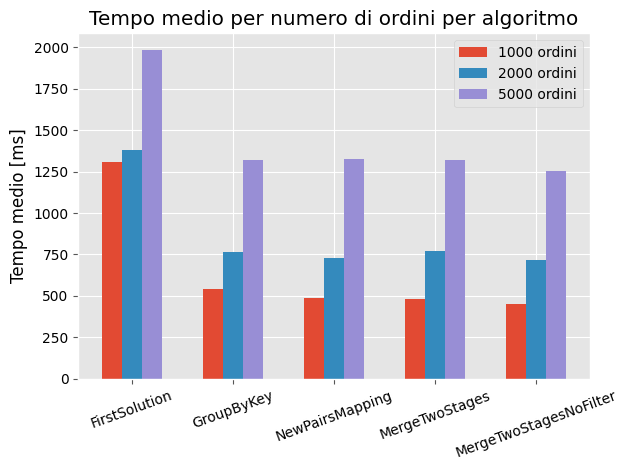

In [ ]:
solutions = {
    'Nome soluzione': ['FirstSolution', 'GroupByKey', 'NewPairsMapping', 'MergeTwoStages', 'MergeTwoStagesNoFilter'],
    '1000 ordini': [1307, 540, 487, 481, 454],
    '2000 ordini': [1382, 764, 729, 770, 719],
    '5000 ordini': [1984, 1320, 1325, 1319, 1254]
}

# Creazione del DataFrame
df = pd.DataFrame(solutions)

# Impostazione dell'indice
df.set_index('Nome soluzione', inplace=True)

# Creazione del grafico a barre raggruppato
bar_width = 0.2
x = np.arange(len(df.index))

# Creazione delle barre
plt.bar(x, df['1000 ordini'], width=bar_width, label='1000 ordini', align='center')
plt.bar(x + bar_width, df['2000 ordini'], width=bar_width, label='2000 ordini', align='center')
plt.bar(x + 2 * bar_width, df['5000 ordini'], width=bar_width, label='5000 ordini', align='center')

# Aggiunta delle etichette e del titolo
plt.ylabel('Tempo medio [ms]', color='black')
plt.title('Tempo medio per numero di ordini per algoritmo')
plt.xticks(x + bar_width, df.index, rotation=20, color='black')
plt.yticks(color='black')
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()